## Week 4 Part 2 Assignment:
## CUNY MSDS DATA620 - Web Analytics
---
### Team5: Christopher Estevez, Meaghan Burke, Rickidon Singh,  Ritesh Lohiya, Rose Koh
### 07/02/2018 (due date)
##### python version: ?
---

## High Frequency Words


Please answer the following questions in an IPython Notebook, posted to GitHub.

    1.Choose a corpus of interest.
    
    2.How many total unique words are in the corpus?  (Please feel free to define unique words in any interesting, 
    defensible way).

    3.Taking the most common words, how many unique words represent half of the total words in the corpus?
    
    4.Identify the 200 highest frequency words in this corpus.
    
    5.Create a graph that shows the relative frequency of these 200 words.
    
    6.Does the observed relative frequency of these words follow Zipf’s law? Explain.
    
    7.In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

In [2]:
import nltk
import urllib.request
import pandas as pd
from nltk import word_tokenize
from nltk import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
import string
%matplotlib inline

1. Choose a corpus of interest.

For the High Frequency Words study we have used the text "1946-Truman.txt" from NLTK Corpora

In [3]:
print(nltk.__file__)

C:\Users\rites\Anaconda3\lib\site-packages\nltk\__init__.py


In [4]:
from nltk.corpus import state_union

In [5]:
dataset = state_union.raw("1946-Truman.txt")

In [6]:
tokens = word_tokenize(dataset)
words = [w for w in tokens if w.isalpha()]
words = [w.lower() for w in words]

Counting Vocabulary

In [7]:
len(tokens)

30004

In [8]:
len(words)

26603

2. Total Unique Words:

In [9]:
len(set(words))

3146

In [10]:
round(len(words) / len(set(words)), 2)

8.46

Now lets remove the stop words and see the Unique Words:

In [11]:
stop_words = set(stopwords.words("english") + list(string.punctuation))


In [12]:
words1 = [w for w in words if w not in stop_words]


In [13]:
len(words1)

14099

In [14]:
len(set(words1))

3032

We will try Porter Stemmer and see if we can reduce the unique words

In [15]:
ps = PorterStemmer()
words2 = [ps.stem(w) for w in words1]
words2 = set(words2)

In [16]:
len(set(words2))

2077

So the unique words are - 2077

3. Half the Unique Words

Frequency distribution of the unique words in the corpus

In [17]:
freq_distribution = nltk.FreqDist(words1)
freq_distribution
all_words = freq_distribution.most_common()


In [18]:
aw = 0
half_words = []
for w in all_words:
    if aw >= len(words1)/2:
        break
    else:
        aw = aw + w[1]
        half_words.append(w)

len(half_words)

253

There are 253 unique words make up 50% of the words in the text - words1.

In [19]:
hw = pd.DataFrame(half_words, columns = ['Words','Count'])
hw.head()

,Words,Count
0,dollars,207
1,war,187
2,year,181
3,million,137
4,fiscal,127


4. Identify the 200 highest frequency words in this corpus.

In [20]:
top200 = freq_distribution.most_common(200)
top_200 = pd.DataFrame(top200, columns = ['Word', 'Count'])
top_200.head()


,Word,Count
0,dollars,207
1,war,187
2,year,181
3,million,137
4,fiscal,127


5. Create a graph that shows the relative frequency of these 200 words.

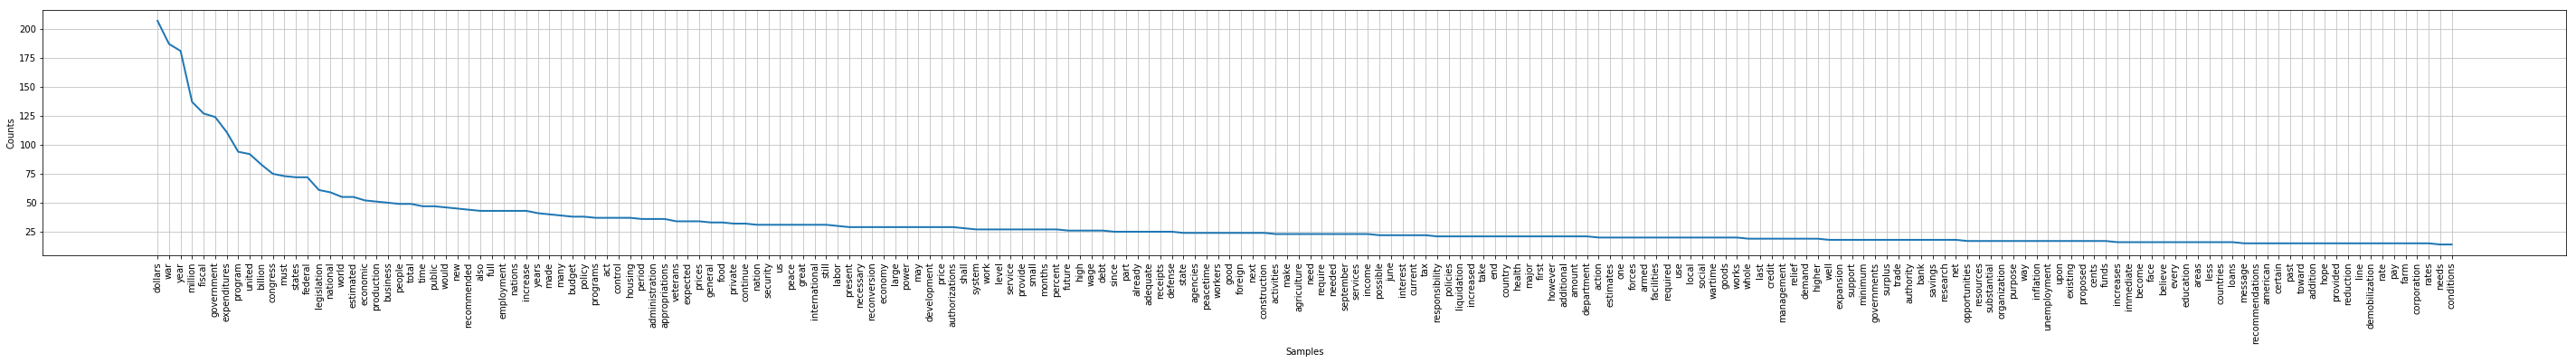

In [21]:
plt.figure(figsize=(50, 5))
freq_distribution.plot(200)

6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

Zipf's law simply states that given some corpus (large and structured set of texts) of natural language utterances, the occurrence of the most frequent word will be approximately twice as often as the second most frequent word, three times as the third most frequent word, four times as the fourth most frequent word, and so forth.

In [22]:
zipf_data = top_words = freq_distribution.most_common(2000)
x = [w+1 for w in range(len(zipf_data))]
y = [freq for (word,freq) in zipf_data]

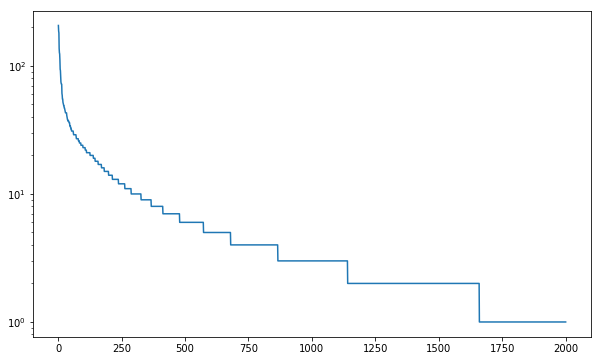

In [23]:
plt.figure(1, figsize=(10,6))
plt.semilogy(x, y)
plt.show()


The relative frequency of these words does follow Zipf's law because, if we look at the plot above, their frequency is not proportional to their ranking. There is also a drop in the frequency after the first few words.

7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.

After this excersice, we conclude that the worlds in this corpora doesnot differ with the words in other corpara. The use of words are evenly balanced atleast for the top words. Also here the zipf's law does not fit here as frequency is not proportional to their ranking